In [ ]:
pip install tsai

In [ ]:
import inspect
import numpy as np
import matplotlib.pyplot as plt
from tsai.all import *
import sklearn.metrics as skm

np.random.seed(7)

In [ ]:
from sklearn.datasets import load_digits
import numpy as np

data = load_digits()
X, y = data.data, data.target

idx = np.arange(X.shape[0])
np.random.shuffle(idx)

X, y = X[idx], y[idx]
X_train, y_train = X[:1250], y[:1250]
X_test, y_test = X[1250:], y[1250:]


In [ ]:
X_train = to3d(X_train)

X_test = to3d(X_test)


In [ ]:
y_train.shape

(1250,)

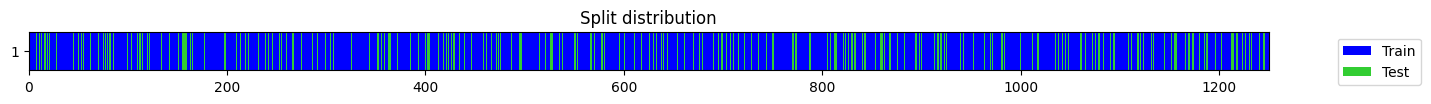

((#1000) [947,440,377,6,487,334,1024,540,704,1102...],
 (#250) [371,1111,843,887,434,77,919,1223,980,1060...])

In [ ]:
splits = get_splits(y_train, valid_size=.2, stratify=True, random_state=23, shuffle=True)
splits


SuggestedLRs(valley=0.0020892962347716093)

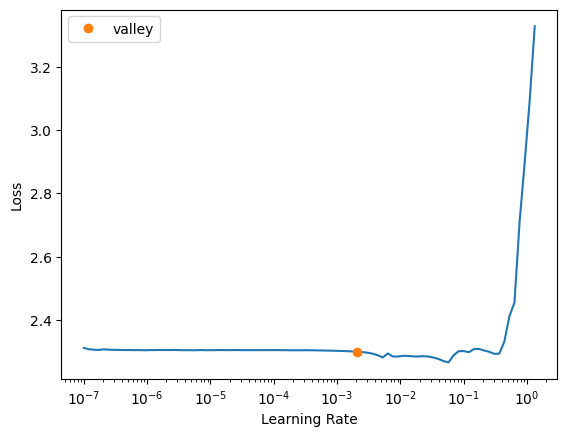

In [ ]:
tfms = [None, TSClassification()]
batch_tfms = TSStandardize(by_sample=True)
dls = get_ts_dls(X_train, y_train, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=128)


learn = ts_learner(dls, LSTM, metrics=rmse, cbs=ShowGraph())
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time
0,2.304821,2.304717,0.108000,00:01
1,2.304502,2.303570,0.108000,00:01
2,2.304047,2.302088,0.108000,00:01
3,2.303247,2.300099,0.108000,00:01
4,2.302019,2.297415,0.108000,00:01
5,2.300582,2.293765,0.108000,00:00
6,2.298689,2.288624,0.108000,00:01
7,2.296110,2.281061,0.124000,00:01
8,2.292370,2.268891,0.228000,00:01
9,2.287017,2.245896,0.284000,00:01


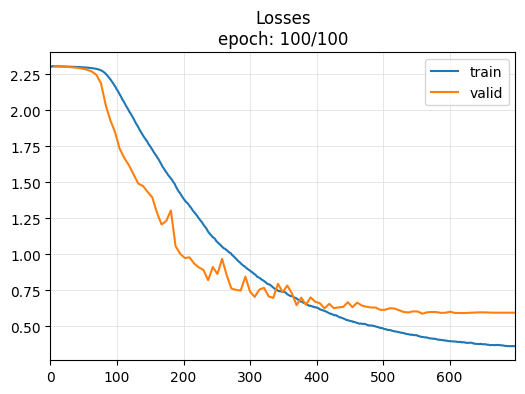

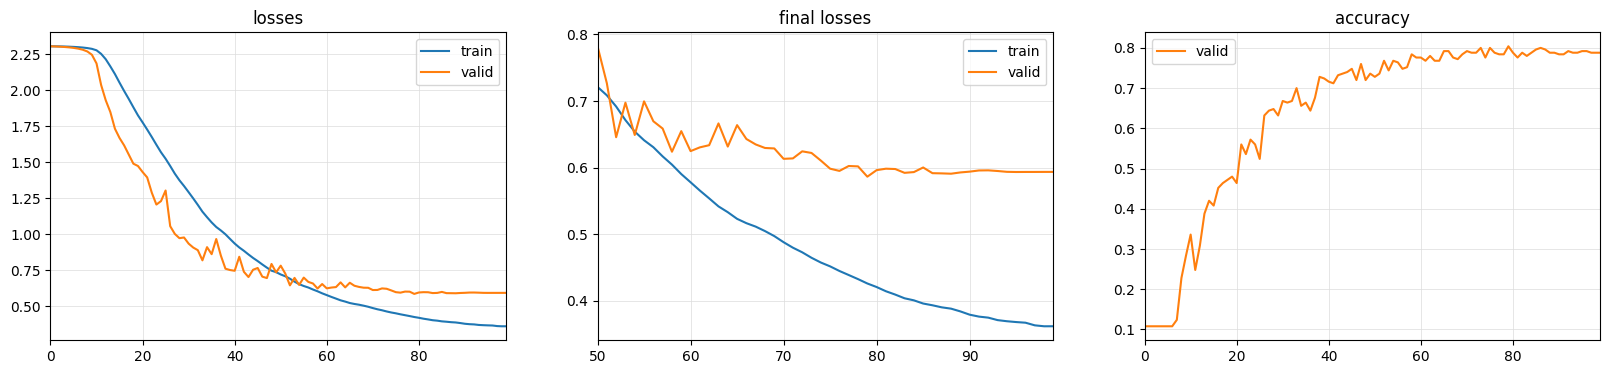

In [ ]:
learn = ts_learner(dls, LSTM, metrics=accuracy, cbs=ShowGraph())
learn.fit_one_cycle(100, 1e-3)


In [ ]:
probas, _, preds = learn.get_X_preds(y_test)
